In [41]:
# Importing libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from collections import defaultdict

In [42]:
def read_data(years, cols):
    X = []
    Y = []
    for year in years:
        file = "./data/A5_q4/" + str(year) + ".csv"
        sample_input = pd.read_csv(file, usecols=cols).values
        
        X_tmp = sample_input[:,:-1]
        Y_tmp = sample_input[:,-1]
        Y_tmp = np.reshape(Y_tmp, (len(Y_tmp), 1))
    
        if len(X) == 0:
            X = X_tmp
            Y = Y_tmp
        else:
            X = np.vstack((X, X_tmp))
            Y = np.vstack((Y, Y_tmp))
    
    return X, Y

def multiple_lr(X, Y):
    beta = np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.dot(np.transpose(X), Y))

    Y_pred = predict(X, beta)
    
    return Y_pred, beta

def predict(X, beta):
    return np.dot(X, beta)

def residual(Y_actual, Y_pred):
    return np.subtract(Y_actual, Y_pred)

def error(Y_actual, Y_pred):
    sse = np.sum(np.square(Y_pred - Y_actual))
    mape = (100*np.sum(np.divide(np.abs(Y_actual - Y_pred), Y_actual)))/len(Y_actual)
    
    return sse, mape

In [43]:
cols = ['FG%', 'ORB', 'DRB', 'TRB', 'PTS']

In [48]:
# Q-4 (a)

X_train, Y_train = read_data([2017], cols)

Y_pred, beta = multiple_lr(X_train[:,[0,3]], Y_train)
print(beta)
print(error(Y_pred, Y_train))

[[ 165.62434772]
 [   0.68659874]]
(219.92094440752467, 1.9262952101991986)


In [71]:
# Q-4 (b)

X_train, Y_train = read_data([2017], cols)

Y_pred, beta = multiple_lr(X_train, Y_train)
print(beta)
print(error(Y_pred, Y_train))

[[ 162.50582185]
 [  -2.11125195]
 [  -1.98843192]
 [   2.73594995]]
(219.42900790556914, 1.9123847664110871)


In [72]:
temp = np.corrcoef([X_train[:, 0], X_train[:,1], X_train[:,2], X_train[:,3]])
print(temp)

[[ 1.         -0.13060113  0.09481773 -0.02841355]
 [-0.13060113  1.          0.02385551  0.73123864]
 [ 0.09481773  0.02385551  1.          0.69898617]
 [-0.02841355  0.73123864  0.69898617  1.        ]]


In [73]:
# Q-4 (c)(d)

def plot_residual(Y_pred, res, title):
    plt.scatter(Y_pred, res)
    plt.xlabel("Y_pred")
    plt.ylabel("Residual")
    plt.title(title)
    plt.show()
    
def plot_pdf(X, bins, title):
    weights = np.ones_like(X)/float(len(X))
    plt.hist(X, bins = bins, weights=weights)
    plt.xlabel("Residual")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()
    
def predict_pts(train_years, test_years, title):
    X_train, Y_train = read_data(train_years, cols)
    X_test, Y_test = read_data(test_years, cols)

    _, beta = multiple_lr(X_train[:, [0, 3]], Y_train)

    Y_pred = predict(X_test[:, [0, 3]], beta)

    sse, mape = error(Y_test, Y_pred)
    print("Part %s :\nSSE: %f\nMAPE: %f\n\n" % (title, sse, mape))

    res = residual(Y_test, Y_pred)
    print("Variance of residuals: %f" % (np.var(res)))
    plot_residual(Y_test, \
                  res, \
                  "Q4(d) " + title + " Predicted PTS and Residual")
    
    plot_pdf(res, 30, "Q4(e) " + title + " Residual Distribution")
    

Part (i) :
SSE: 139.466218
MAPE: 1.529443


Variance of residuals: 4.597430


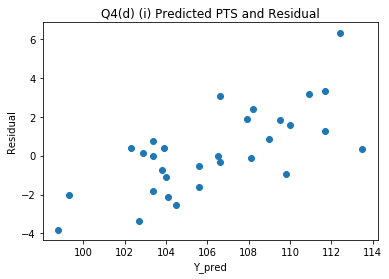

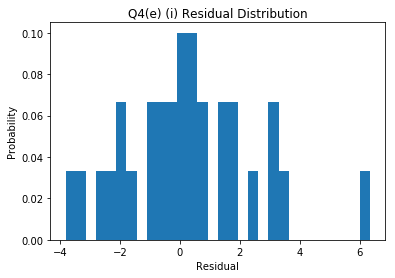

In [74]:
# Q-4 (c)(d) (i)
predict_pts([2017], [2018], '(i)')

Part (ii) :
SSE: 199.142764
MAPE: 1.861052


Variance of residuals: 4.633787


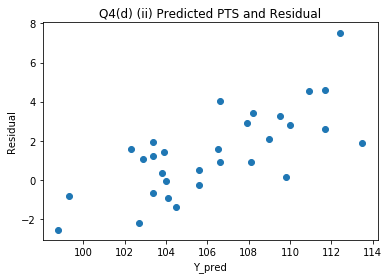

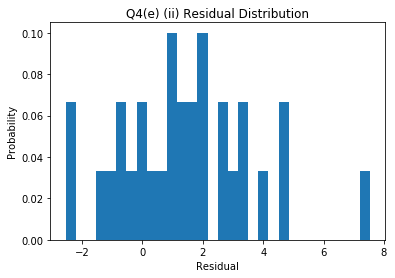

In [75]:
# Q-4 (c) (ii)
predict_pts([2016, 2017], [2018], '(ii)')

Part (iii) :
SSE: 680.809330
MAPE: 3.927207


Variance of residuals: 4.809462


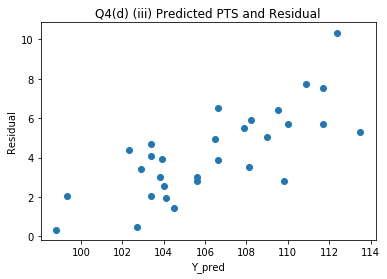

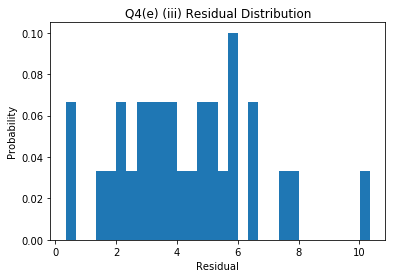

In [76]:
# Q-4 (c) (iii)
predict_pts([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], [2018], '(iii)')